In [43]:
house_prices.csv.zip

NameError: name 'house_prices' is not defined

In [45]:
import zipfile

with zipfile.ZipFile("house_prices.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [49]:
df = pd.read_csv("house_prices.csv")
df.head()


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [51]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [53]:
df.isnull().sum()


,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Carpet Area,80673
Status,615
Floor,7077
Transaction,83


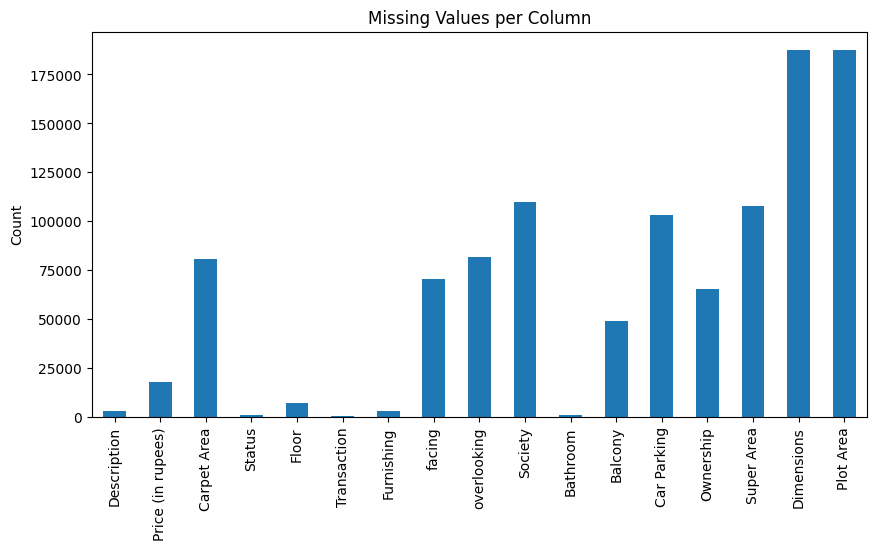

In [55]:
missing = df.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("No missing values found in the dataset.")
else:
    missing.plot(kind='bar', figsize=(10,5))
    plt.title("Missing Values per Column")
    plt.ylabel("Count")
    plt.show()


In [57]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [59]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-3421764164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [61]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-3421764164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [63]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3902818140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [65]:
threshold = len(df) * 0.4
df.dropna(thresh=threshold, axis=1, inplace=True)


In [67]:
df.isnull().sum()


,0
Index,0
Title,0
Description,0
Amount(in rupees),0
Price (in rupees),0
location,0
Carpet Area,0
Status,0
Floor,0
Transaction,0


In [69]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        187531 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  187531 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        187531 non-null  object 
 7   Status             187531 non-null  object 
 8   Floor              187531 non-null  object 
 9   Transaction        187531 non-null  object 
 10  Furnishing         187531 non-null  object 
 11  facing             187531 non-null  object 
 12  overlooking        187531 non-null  object 
 13  Society            187531 non-null  object 
 14  Bathroom           187531 non-null  object 
 15  Balcony            187531 non-null  object 
 16  Ca

(187531, 19)

In [71]:
print("Final dataset shape:", df.shape)


Final dataset shape: (187531, 19)


In [72]:
df.to_csv("cleaned_house_prices.csv", index=False)
